#### Importing Libraries

In [1]:
#!pip install imbalanced-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
pd.set_option('display.max_columns', None)

#### Loading Dataset

In [79]:
df = pd.read_csv(r'C:\Users\HP\Desktop\CV, P.Statement and others\10 Academy\week 6\bank-additional\bank-additional\bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### EXPLORATORY DATA ANALYSIS

In [22]:
#Univariante Analysis
def univariante_plot(column, data):
    plot = sns.catplot(x=column, data=data, kind='count')
    plot.set_xticklabels(rotation=45)
    plt.show()
    return plot

#bivariante Analysis
def bivariante_plot(cat, num, data, hue):
    plot = sns.catplot(x=cat, y=num, data=data, kind='box', hue=hue)
    plot.set_xticklabels(rotation=45)
    plt.show()
    return plot

# Distribution plots
def distribution_plot(col, col_distribution):
    plot = sns.distplot(df[col], kde=False, color='red', bins=10)
    plt.title(col_distribution, fontsize=18)
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.show()
    return plot

#boxplots for outlier detection
def outlier(col, col_distribution):
    chart = sns.boxplot(x=df[col])
    plt.title(col_distribution, fontsize=18)
    plt.xlabel(col, fontsize=16)
    plt.show()
    return chart


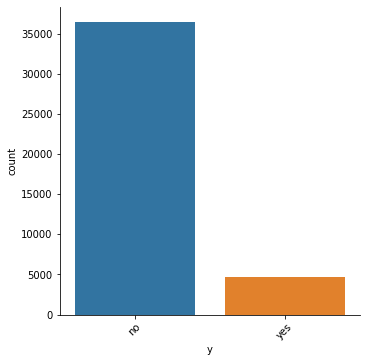

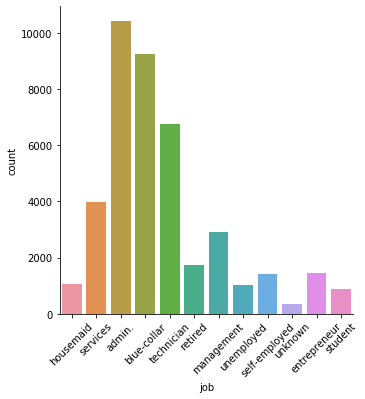

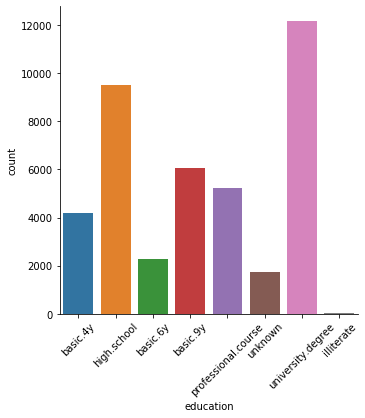

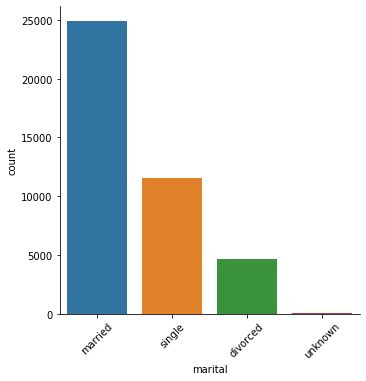

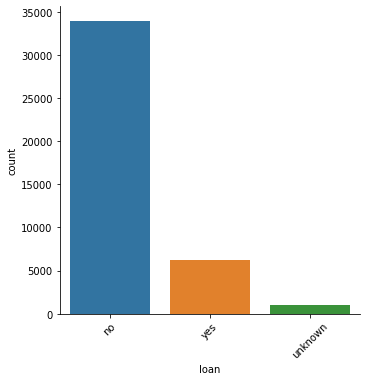

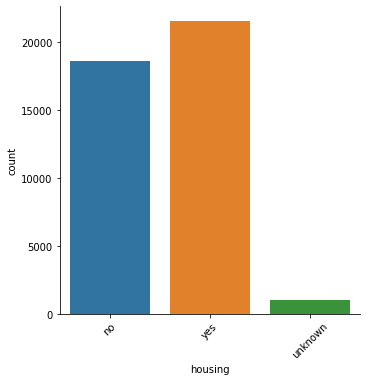

In [7]:
univariante_plot('y', df)
univariante_plot('job', df)
univariante_plot('education', df)
univariante_plot('marital', df)
univariante_plot('loan', df)
univariante_plot('housing', df)

From the univariante analysis, we see that there is a class imbalance in the target variable "y" with our main target being the minority class "yes", feeding this imbalanced data to out classifier can make it biased in favor of the majority class "no", simply because it did not have enough data to learn about the minority. 

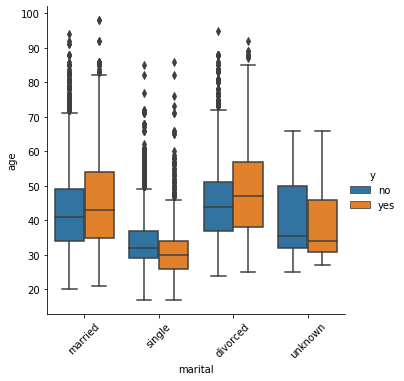

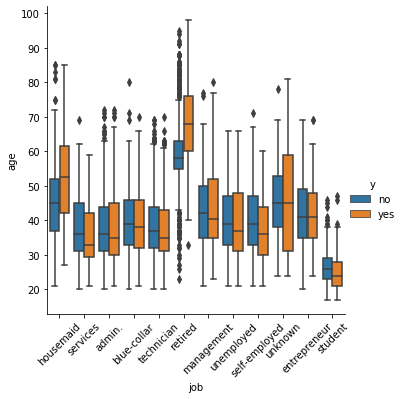

In [8]:
bivariante_plot('marital', 'age', df, 'y')
bivariante_plot('job','age', df, 'y')


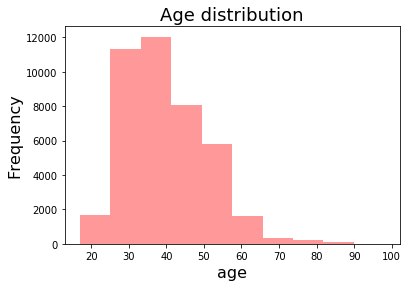

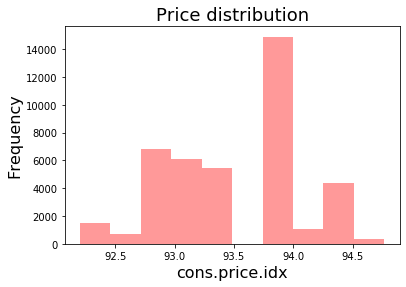

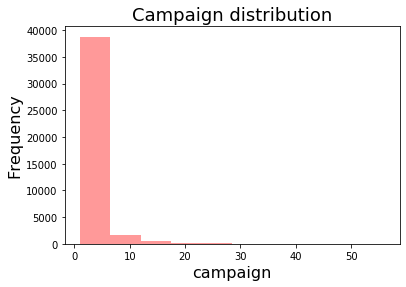

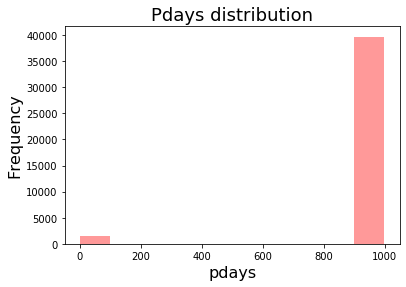

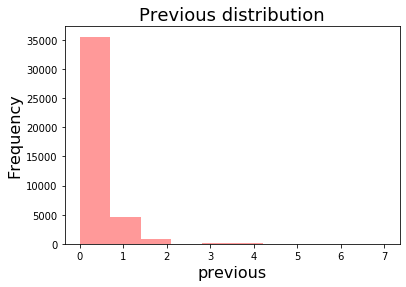

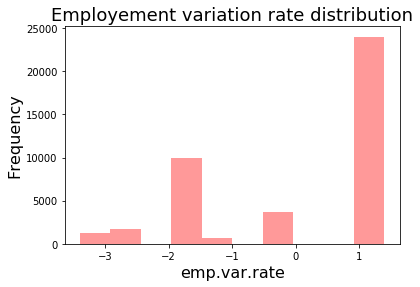

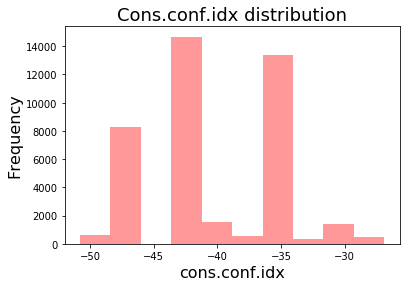

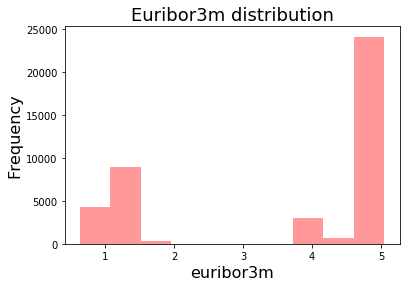

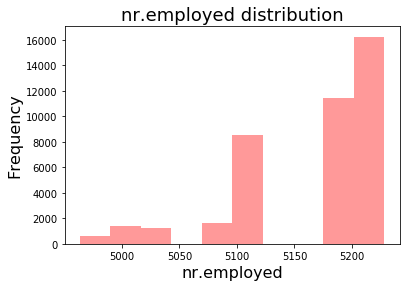

In [23]:
distribution_plot('age', 'Age distribution')
distribution_plot('cons.price.idx', 'Price distribution')
distribution_plot('campaign', 'Campaign distribution')
distribution_plot('pdays', 'Pdays distribution')
distribution_plot('previous', 'Previous distribution')
distribution_plot('emp.var.rate', 'Employement variation rate distribution')
distribution_plot('cons.conf.idx', 'Cons.conf.idx distribution')
distribution_plot('euribor3m', 'Euribor3m distribution')
distribution_plot('nr.employed', 'nr.employed distribution')

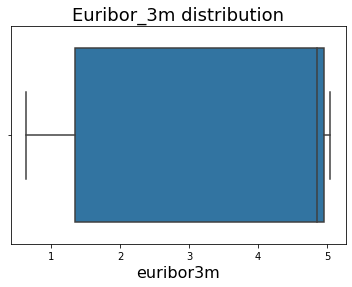

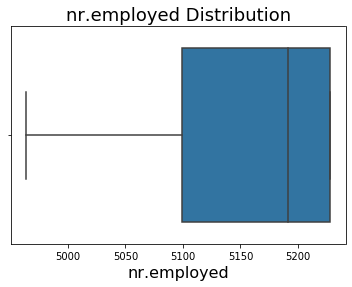

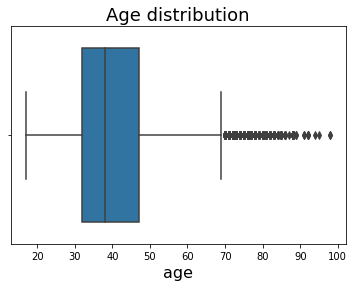

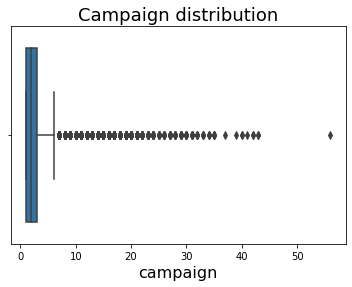

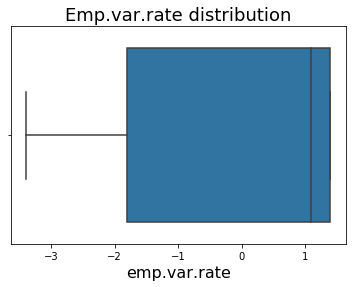

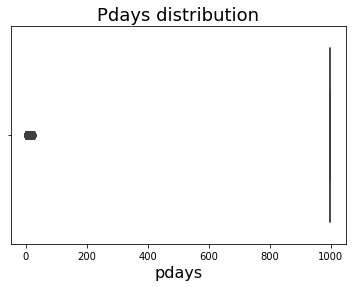

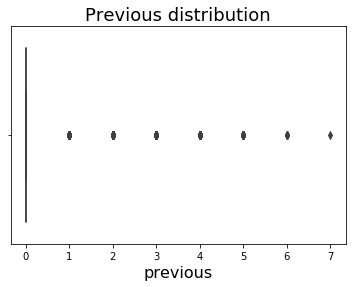

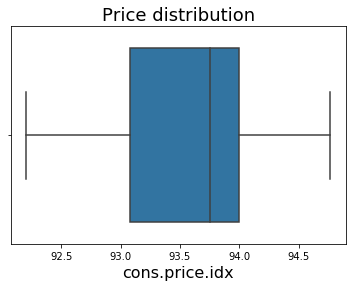

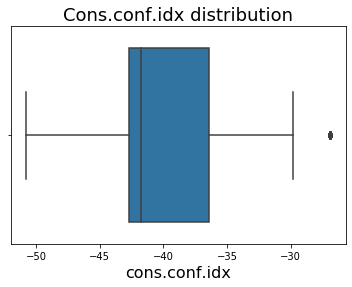

In [24]:
outlier('euribor3m', 'Euribor_3m distribution')
outlier('nr.employed','nr.employed Distribution' )
outlier('age', 'Age distribution')
outlier('campaign', 'Campaign distribution')
outlier('emp.var.rate', 'Emp.var.rate distribution')
outlier('pdays', 'Pdays distribution')
outlier('previous', 'Previous distribution')
outlier('cons.price.idx', 'Price distribution')
outlier('cons.conf.idx', 'Cons.conf.idx distribution')




In [80]:
#Treating the outliers 
def replace_outlier_with_median(dataFrame, feature):
    """ a function for replacing outliers with the median, used when there's too many outliers in a feature"""
    Q1 = dataFrame[feature].quantile(0.25)
    Q3 = dataFrame[feature].quantile(0.75)
    median = dataFrame[feature].quantile(0.50)

    IQR = Q3 - Q1

    upper_whisker = Q3 + (1.5 * IQR)
    lower_whisker = Q1 - (1.5 * IQR)

    dataFrame[feature] = np.where(dataFrame[feature] > upper_whisker, median, dataFrame[feature])
    dataFrame[feature] = np.where(dataFrame[feature] < lower_whisker, median, dataFrame[feature])

In [81]:
replace_outlier_with_median(df, 'age')
replace_outlier_with_median(df, 'campaign')
replace_outlier_with_median(df, 'previous')

In [82]:
replace_outlier_with_median(df, 'cons.conf.idx')
replace_outlier_with_median(df, 'pdays')


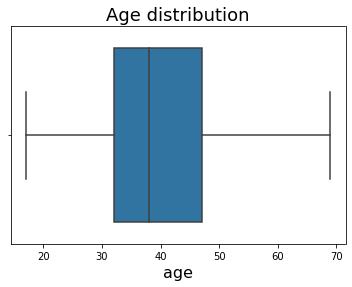

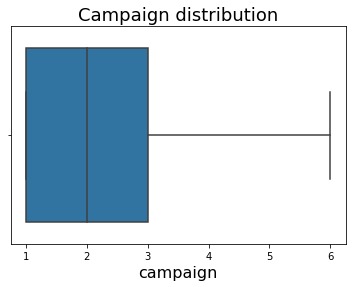

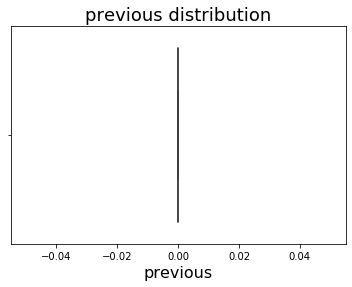

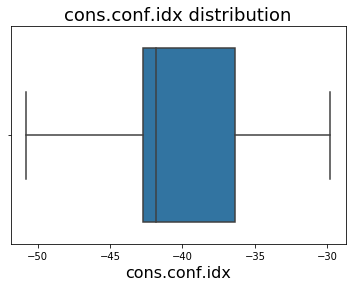

In [83]:
outlier('age', 'Age distribution')
outlier('campaign', 'Campaign distribution')
outlier('previous', 'previous distribution')
outlier('cons.conf.idx', 'cons.conf.idx distribution')

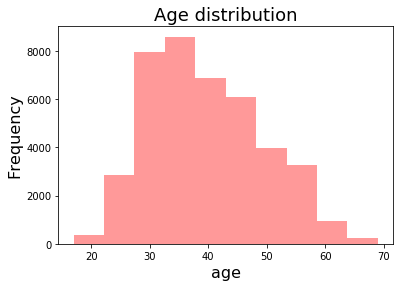

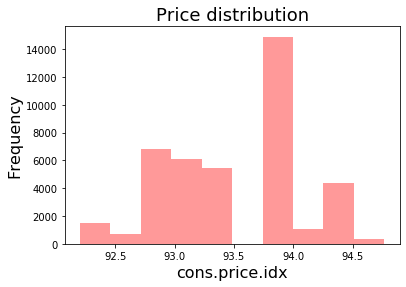

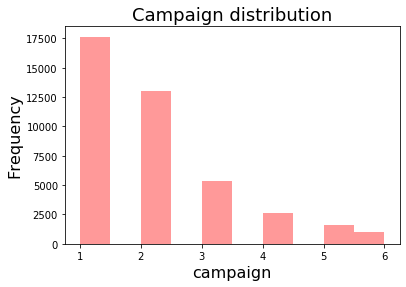

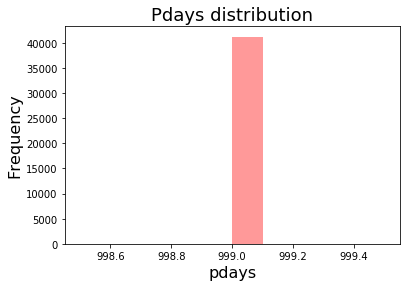

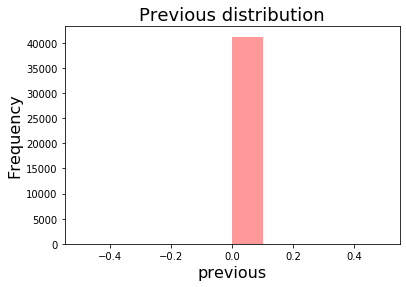

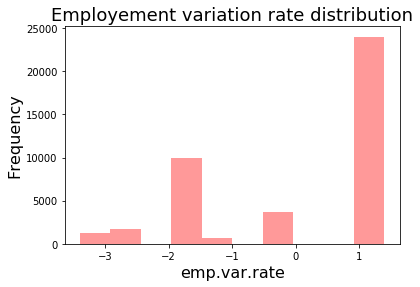

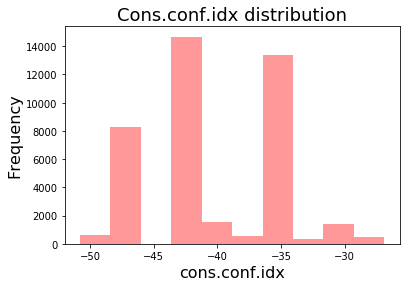

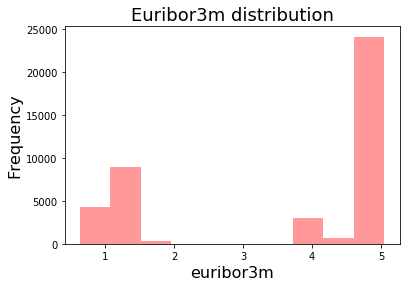

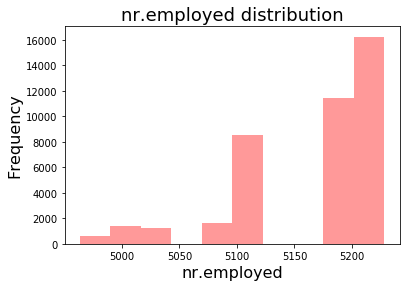

In [15]:
distribution_plot('age', 'Age distribution')
distribution_plot('cons.price.idx', 'Price distribution')
distribution_plot('campaign', 'Campaign distribution')
distribution_plot('pdays', 'Pdays distribution')
distribution_plot('previous', 'Previous distribution')
distribution_plot('emp.var.rate', 'Employement variation rate distribution')
distribution_plot('cons.conf.idx', 'Cons.conf.idx distribution')
distribution_plot('euribor3m', 'Euribor3m distribution')
distribution_plot('nr.employed', 'nr.employed distribution')

In [52]:
#df["age"].skew()
# skewness along the index axis 
df.skew(axis = 0, skipna = True)

age               0.443890
duration          3.263141
campaign          1.352303
pdays             0.000000
previous          0.000000
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.141952
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

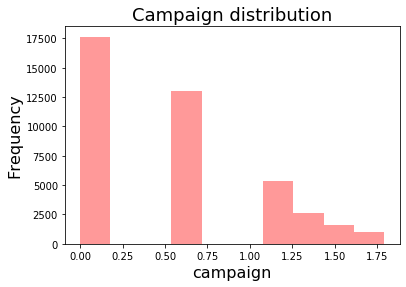

0.46054532714464524

In [84]:
df['campaign']=np.log(df['campaign'])
distribution_plot('campaign', 'Campaign distribution')
df['campaign'].skew()


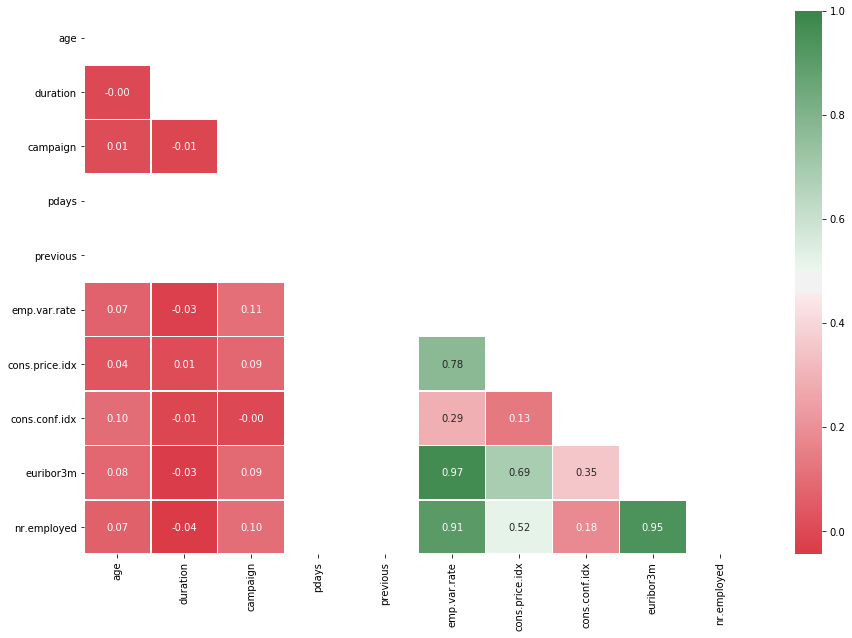

In [33]:
#correlation
df.corr()
upper_triangle = np.zeros_like(df.corr(), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True #make sure we don't show half of the other triangle
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(),ax=ax,mask=upper_triangle,annot=True, fmt='.2f',linewidths=0.5,cmap=sns.diverging_palette(10, 133, as_cmap=True))


#### DATA PRE-PROCESSING

In [85]:
# Convering the categorical data to numerical format using oneHotEncoding

#create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],use_cat_names=True)

# encode the categorical variables
df = OHE.fit_transform(df)



,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,duration,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,261,0.0,999.0,0.0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,149,0.0,999.0,0.0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,226,0.0,999.0,0.0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,151,0.0,999.0,0.0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,307,0.0,999.0,0.0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no


In [86]:
#Feature and Target variables
#Feature_after = df[['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'age', 'pdays','campaign','housing_no','housing_yes', 'job_admin.']]
Feature = df.drop(['y','duration','emp.var.rate','nr.employed'], axis=1)
Feature.head()
#Feature_after.head()

,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,cons.price.idx,cons.conf.idx,euribor3m
0,56.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,999.0,0.0,1,0,0,93.994,-36.4,4.857
1,57.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,999.0,0.0,1,0,0,93.994,-36.4,4.857
2,37.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,999.0,0.0,1,0,0,93.994,-36.4,4.857
3,40.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,999.0,0.0,1,0,0,93.994,-36.4,4.857
4,56.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,999.0,0.0,1,0,0,93.994,-36.4,4.857


In [ ]:
#all columns before feature engineering
num_cols = ['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'age', 'pdays','campaign','previous']


Feature[num_cols].head()
Feature[num_cols] = scaler.fit_transform(Feature[num_cols])
Feature.head()

#columns after feature engineering
#num_cols_after = ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'age', 'pdays','campaign','housing_no','housing_yes', 'job_admin.']

#scaling features after engineering
#Feature_after[num_cols_after].head()
#Feature_after[num_cols_after] = scaler.fit_transform(Feature[num_cols_after])
#Feature_after.head()


In [87]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#scaling numerical columns in dataframe
X = pd.DataFrame(scaler.fit_transform(Feature), columns=Feature.columns )
X.head()




,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,cons.price.idx,cons.conf.idx,euribor3m
0,1.706581,6.152772,-0.326556,-0.582023,-0.538317,-0.442449,-0.208757,-0.276435,-0.158872,-0.189032,-0.089871,-0.19143,-0.147327,0.807638,-0.624938,-0.355097,-0.044115,2.977084,-0.548100,-0.242748,-0.414743,-0.381918,-0.209453,-0.647531,-0.02091,0.513713,-0.513600,-0.008535,1.100814,-1.048877,-0.156933,0.461731,-0.422872,-0.156933,1.31827,-1.31827,1.411155,-0.385042,-0.459253,-0.420076,-0.133197,-0.332532,-0.066621,-0.115907,-0.261274,-0.118462,1.959,-0.494394,-0.496067,-0.514581,-0.484371,-1.013071,0.0,0.0,0.397706,-0.33929,-0.1857,0.722722,0.968067,0.71246
1,1.810519,-0.162528,3.062258,-0.582023,-0.538317,-0.442449,-0.208757,-0.276435,-0.158872,-0.189032,-0.089871,-0.19143,-0.147327,0.807638,-0.624938,-0.355097,-0.044115,-0.335899,1.824485,-0.242748,-0.414743,-0.381918,-0.209453,-0.647531,-0.02091,-1.946613,1.947042,-0.008535,1.100814,-1.048877,-0.156933,0.461731,-0.422872,-0.156933,1.31827,-1.31827,1.411155,-0.385042,-0.459253,-0.420076,-0.133197,-0.332532,-0.066621,-0.115907,-0.261274,-0.118462,1.959,-0.494394,-0.496067,-0.514581,-0.484371,-1.013071,0.0,0.0,0.397706,-0.33929,-0.1857,0.722722,0.968067,0.71246
2,-0.268244,-0.162528,3.062258,-0.582023,-0.538317,-0.442449,-0.208757,-0.276435,-0.158872,-0.189032,-0.089871,-0.19143,-0.147327,0.807638,-0.624938,-0.355097,-0.044115,-0.335899,1.824485,-0.242748,-0.414743,-0.381918,-0.209453,-0.647531,-0.02091,0.513713,-0.513600,-0.008535,-0.908418,0.953401,-0.156933,0.461731,-0.422872,-0.156933,1.31827,-1.31827,1.411155,-0.385042,-0.459253,-0.420076,-0.133197,-0.332532,-0.066621,-0.115907,-0.261274,-0.118462,1.959,-0.494394,-0.496067,-0.514581,-0.484371,-1.013071,0.0,0.0,0.397706,-0.33929,-0.1857,0.722722,0.968067,0.71246
3,0.043571,-0.162528,-0.326556,1.718146,-0.538317,-0.442449,-0.208757,-0.276435,-0.158872,-0.189032,-0.089871,-0.19143,-0.147327,0.807638,-0.624938,-0.355097,-0.044115,-0.335899,-0.548100,4.119506,-0.414743,-0.381918,-0.209453,-0.647531,-0.02091,0.513713,-0.513600,-0.008535,1.100814,-1.048877,-0.156933,0.461731,-0.422872,-0.156933,1.31827,-1.31827,1.411155,-0.385042,-0.459253,-0.420076,-0.133197,-0.332532,-0.066621,-0.115907,-0.261274,-0.118462,1.959,-0.494394,-0.496067,-0.514581,-0.484371,-1.013071,0.0,0.0,0.397706,-0.33929,-0.1857,0.722722,0.968067,0.71246
4,1.706581,-0.162528,3.062258,-0.582023,-0.538317,-0.442449,-0.208757,-0.276435,-0.158872,-0.189032,-0.089871,-0.19143,-0.147327,0.807638,-0.624938,-0.355097,-0.044115,-0.335899,1.824485,-0.242748,-0.414743,-0.381918,-0.209453,-0.647531,-0.02091,0.513713,-0.513600,-0.008535,1.100814,-1.048877,-0.156933,-2.165761,2.364781,-0.156933,1.31827,-1.31827,1.411155,-0.385042,-0.459253,-0.420076,-0.133197,-0.332532,-0.066621,-0.115907,-0.261274,-0.118462,1.959,-0.494394,-0.496067,-0.514581,-0.484371,-1.013071,0.0,0.0,0.397706,-0.33929,-0.1857,0.722722,0.968067,0.71246


In [90]:
X.shape

(41188, 60)

In [89]:
# creating instance of labelencoder
lbe = LabelEncoder()
# Assigning numerical values and storing in another column
y = lbe.fit_transform(df.y)
y =  pd.DataFrame(target, columns = ['y'])
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [93]:
#Applying PCA for dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
pca_model = pca.fit(X_train)
pca_train = pca_model.transform(X_train)
pca_train

array([[-1.60083333e+00, -1.33210344e+00,  1.37710669e-01, ...,
         6.38890728e-16,  1.82968630e-31, -3.48541575e-31],
       [-7.56647763e-01,  7.00694563e-01,  2.58986447e+00, ...,
        -1.09917576e-15,  1.78385558e-30,  1.88669844e-31],
       [-3.27783097e+00,  8.92390749e-01, -5.97992998e-01, ...,
         1.24982945e-15, -2.62804480e-30, -7.16157629e-31],
       ...,
       [ 5.73317004e-02, -3.68425057e-01,  1.68329537e+00, ...,
        -1.68086783e-17,  4.14915161e-31, -5.52571787e-31],
       [ 3.38155183e+00,  2.04943013e+00, -2.34282583e+00, ...,
         1.54999770e-15,  6.74880087e-31,  7.47844086e-32],
       [-3.30947655e-01,  4.01962905e-01,  1.47863350e+00, ...,
         2.88423640e-16, -1.16263254e-30, -3.86952805e-31]])

In [94]:
pca_model.explained_variance_

array([4.27189520e+00, 2.66023999e+00, 2.41503086e+00, 2.29934367e+00,
       2.04825148e+00, 1.92202705e+00, 1.81221322e+00, 1.71724233e+00,
       1.68801868e+00, 1.65485304e+00, 1.56920914e+00, 1.46733955e+00,
       1.43180886e+00, 1.37569830e+00, 1.33384585e+00, 1.28798002e+00,
       1.25040680e+00, 1.23859161e+00, 1.21418741e+00, 1.20682790e+00,
       1.16546104e+00, 1.12850066e+00, 1.12001967e+00, 1.09239189e+00,
       1.06204041e+00, 1.04807869e+00, 1.03476774e+00, 1.02854918e+00,
       1.00797616e+00, 9.96408790e-01, 9.92874090e-01, 9.72936781e-01,
       9.61204179e-01, 9.09974081e-01, 9.01137469e-01, 8.70329015e-01,
       8.54076439e-01, 8.11033189e-01, 7.99163181e-01, 7.11518232e-01,
       6.98131253e-01, 6.05870490e-01, 5.41086207e-01, 4.15792520e-01,
       3.29358069e-01, 2.10834522e-01, 1.15761558e-01, 6.19614348e-29,
       1.45216420e-29, 1.26414922e-29, 1.11506409e-29, 2.30319952e-30,
       1.53515148e-30, 1.44861063e-30, 1.14945856e-30, 9.60152122e-31,
      

In [113]:
var = pca_model.explained_variance_ratio_
var[:41].sum()

0.9619108591376571

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

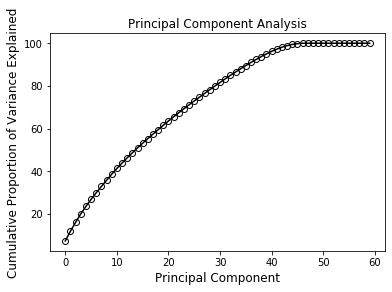

In [108]:
cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)

from the graph about, it ise seen that with 40 component instead of 60, we will still have 95% of the information within 
the dataset, so we can reduce the dataset variables by 20. By this, we got an increase in precision for the minority class from 
67% to 70%.

In [96]:
pca_train = pd.DataFrame(pca_train,columns=['PC_' + str(i) for i in range(1, 61)])
pca_train.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60
0,-1.600833,-1.332103,0.137711,-0.750588,2.394697,-0.157860,-1.376976,-0.226668,-0.016476,-0.936681,0.784427,0.415308,-0.180931,-0.178104,0.383604,2.135289,-0.061841,0.838948,-0.235779,-1.012540,1.221778,0.281396,-0.492226,0.381302,0.011597,-0.625223,-0.171851,-0.337677,0.303168,0.260942,-0.336429,0.273282,0.350165,-0.010501,-0.806378,0.052399,-0.325748,-0.521486,-0.081994,0.835541,-0.144892,0.136800,-0.500197,-0.277370,-0.144025,-0.244476,-0.097021,-9.133373e-16,-3.011473e-15,-3.958942e-16,5.744972e-16,4.902960e-16,7.776005e-16,-3.227697e-16,-1.679853e-15,5.655401e-16,-3.920089e-16,6.388907e-16,1.829686e-31,-3.485416e-31
1,-0.756648,0.700695,2.589864,0.305168,-1.381925,0.557255,1.840223,1.876694,0.313641,1.917085,1.530931,1.181906,-0.348870,-1.021347,-0.233920,-0.517200,-1.202913,-1.104963,-0.310227,-0.545256,-0.439808,-0.658344,0.381296,-0.582468,-0.800222,1.273230,0.204937,0.461694,-0.464849,0.221398,0.769388,-0.815221,-0.973480,0.617605,1.612647,-0.426087,0.522956,0.540854,-0.677526,1.590145,-0.218990,2.577816,1.380451,-0.210949,-0.310763,0.122666,0.032399,-5.652058e-15,-4.272824e-15,3.570696e-15,-1.285362e-15,-1.682697e-15,1.338300e-15,6.530765e-16,1.767461e-15,3.100877e-16,1.454426e-15,-1.099176e-15,1.783856e-30,1.886698e-31
2,-3.277831,0.892391,-0.597993,-0.708467,1.245211,-0.478747,-0.182573,1.322551,0.615079,1.607985,0.936566,1.474216,-0.290752,-0.366893,0.477086,0.261257,1.174924,-1.283186,0.589233,0.173441,-0.689520,-2.894878,-1.718099,0.841326,3.176677,-0.355319,2.869195,-1.714049,-0.002535,-1.506520,-1.223550,-1.848032,-1.440596,0.282345,-0.151023,0.339152,-0.660085,-0.603967,0.099246,-0.689249,0.562027,-0.649346,-0.120549,-0.479184,-0.176882,-0.270132,-0.027524,-1.081862e-15,-1.883705e-16,-4.264054e-15,-3.150057e-17,5.315313e-16,6.423861e-16,-1.166163e-15,-3.337931e-15,9.262706e-16,-1.120323e-15,1.249829e-15,-2.628045e-30,-7.161576e-31
3,-2.054507,-0.040112,-1.026695,-0.696474,0.146835,1.923434,0.421406,-0.508191,-0.932118,0.551527,2.411975,-0.801131,0.498299,-0.200942,-0.620164,0.226036,-1.821582,-0.828992,0.403710,-0.266688,0.030367,-1.183974,0.422491,0.560721,-0.903767,0.567463,-0.293141,-0.279987,-0.886056,0.072844,0.416401,0.702495,0.125252,-0.964615,-0.169258,0.033509,0.829271,-0.796843,-0.674500,2.101294,-0.156224,0.644959,-0.212260,0.993492,-0.128129,-0.227848,-0.026791,-4.891122e-15,-3.809486e-15,9.065139e-15,-1.435108e-15,-8.351323e-16,2.165403e-15,-2.708075e-16,2.164373e-15,8.708285e-16,6.362074e-16,-6.100312e-16,-2.855916e-31,-3.238787e-31
4,-3.969046,2.796234,-0.141761,-0.499767,0.923030,-0.683740,-0.136665,1.266294,0.784518,-0.266779,-0.140167,0.020752,-0.516028,1.015905,1.316371,-1.003522,-0.575588,1.285778,-0.070765,-0.810671,-0.926823,0.609461,-0.930483,0.220153,0.194306,-0.485858,-0.363284,-0.229849,0.285962,0.420641,-0.542687,-0.615671,0.589223,0.186248,0.841549,-0.095256,-1.320629,0.695155,-0.181375,0.483310,0.605030,0.024167,-0.765895,-0.125579,0.059496,-0.238894,0.000612,-6.405664e-15,-1.066101e-15,1.596391e-16,4.041844e-17,-1.969531e-16,-9.952164e-16,5.755785e-16,-1.422876e-15,2.879154e-16,-1.388623e-16,2.850511e-17,1.871102e-30,-2.832196e-31


In [98]:
Y_train1 = y_train.reset_index()

pca_train1 = pd.concat([pca_train,Y_train1],axis=1)
pca_train2 = pca_train1.drop(columns='index')
pca_train2.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,y
0,-1.600833,-1.332103,0.137711,-0.750588,2.394697,-0.157860,-1.376976,-0.226668,-0.016476,-0.936681,0.784427,0.415308,-0.180931,-0.178104,0.383604,2.135289,-0.061841,0.838948,-0.235779,-1.012540,1.221778,0.281396,-0.492226,0.381302,0.011597,-0.625223,-0.171851,-0.337677,0.303168,0.260942,-0.336429,0.273282,0.350165,-0.010501,-0.806378,0.052399,-0.325748,-0.521486,-0.081994,0.835541,-0.144892,0.136800,-0.500197,-0.277370,-0.144025,-0.244476,-0.097021,-9.133373e-16,-3.011473e-15,-3.958942e-16,5.744972e-16,4.902960e-16,7.776005e-16,-3.227697e-16,-1.679853e-15,5.655401e-16,-3.920089e-16,6.388907e-16,1.829686e-31,-3.485416e-31,0
1,-0.756648,0.700695,2.589864,0.305168,-1.381925,0.557255,1.840223,1.876694,0.313641,1.917085,1.530931,1.181906,-0.348870,-1.021347,-0.233920,-0.517200,-1.202913,-1.104963,-0.310227,-0.545256,-0.439808,-0.658344,0.381296,-0.582468,-0.800222,1.273230,0.204937,0.461694,-0.464849,0.221398,0.769388,-0.815221,-0.973480,0.617605,1.612647,-0.426087,0.522956,0.540854,-0.677526,1.590145,-0.218990,2.577816,1.380451,-0.210949,-0.310763,0.122666,0.032399,-5.652058e-15,-4.272824e-15,3.570696e-15,-1.285362e-15,-1.682697e-15,1.338300e-15,6.530765e-16,1.767461e-15,3.100877e-16,1.454426e-15,-1.099176e-15,1.783856e-30,1.886698e-31,1
2,-3.277831,0.892391,-0.597993,-0.708467,1.245211,-0.478747,-0.182573,1.322551,0.615079,1.607985,0.936566,1.474216,-0.290752,-0.366893,0.477086,0.261257,1.174924,-1.283186,0.589233,0.173441,-0.689520,-2.894878,-1.718099,0.841326,3.176677,-0.355319,2.869195,-1.714049,-0.002535,-1.506520,-1.223550,-1.848032,-1.440596,0.282345,-0.151023,0.339152,-0.660085,-0.603967,0.099246,-0.689249,0.562027,-0.649346,-0.120549,-0.479184,-0.176882,-0.270132,-0.027524,-1.081862e-15,-1.883705e-16,-4.264054e-15,-3.150057e-17,5.315313e-16,6.423861e-16,-1.166163e-15,-3.337931e-15,9.262706e-16,-1.120323e-15,1.249829e-15,-2.628045e-30,-7.161576e-31,0
3,-2.054507,-0.040112,-1.026695,-0.696474,0.146835,1.923434,0.421406,-0.508191,-0.932118,0.551527,2.411975,-0.801131,0.498299,-0.200942,-0.620164,0.226036,-1.821582,-0.828992,0.403710,-0.266688,0.030367,-1.183974,0.422491,0.560721,-0.903767,0.567463,-0.293141,-0.279987,-0.886056,0.072844,0.416401,0.702495,0.125252,-0.964615,-0.169258,0.033509,0.829271,-0.796843,-0.674500,2.101294,-0.156224,0.644959,-0.212260,0.993492,-0.128129,-0.227848,-0.026791,-4.891122e-15,-3.809486e-15,9.065139e-15,-1.435108e-15,-8.351323e-16,2.165403e-15,-2.708075e-16,2.164373e-15,8.708285e-16,6.362074e-16,-6.100312e-16,-2.855916e-31,-3.238787e-31,0
4,-3.969046,2.796234,-0.141761,-0.499767,0.923030,-0.683740,-0.136665,1.266294,0.784518,-0.266779,-0.140167,0.020752,-0.516028,1.015905,1.316371,-1.003522,-0.575588,1.285778,-0.070765,-0.810671,-0.926823,0.609461,-0.930483,0.220153,0.194306,-0.485858,-0.363284,-0.229849,0.285962,0.420641,-0.542687,-0.615671,0.589223,0.186248,0.841549,-0.095256,-1.320629,0.695155,-0.181375,0.483310,0.605030,0.024167,-0.765895,-0.125579,0.059496,-0.238894,0.000612,-6.405664e-15,-1.066101e-15,1.596391e-16,4.041844e-17,-1.969531e-16,-9.952164e-16,5.755785e-16,-1.422876e-15,2.879154e-16,-1.388623e-16,2.850511e-17,1.871102e-30,-2.832196e-31,0


#### Concatenate Dependent variable and Principal Components

In [136]:
pc_train3 = pd.concat([pca_train1.iloc[:,:40], pca_train1['y']], axis=1)
pca_train_X = pc_train3.iloc[:,:40]
pca_train_X.shape

In [132]:
y_train.shape

(28831, 1)

In [138]:
y_train.head()

,y
1317,0
23228,1
3524,0
2271,0
4059,0


In [145]:
pca_test = pca.transform(X_test)
pca_test

array([[-2.72958830e+00, -1.18831422e+00, -1.38101747e+00, ...,
        -6.81545793e-16,  3.00457467e-30, -7.88548374e-32],
       [ 1.68118127e+00,  1.82874640e+00, -2.97066259e+00, ...,
        -2.49795213e-16,  1.04120060e-30,  1.03177068e-30],
       [-3.88506320e+00,  2.19748613e+00, -9.40672572e-01, ...,
        -6.37865750e-16,  6.79088184e-31, -1.18392946e-31],
       ...,
       [ 3.12022378e+00, -1.10627652e+00, -1.73199142e+00, ...,
         1.69258155e-15,  2.12522419e-31, -4.96174861e-31],
       [ 4.30722103e+00, -5.90802777e-01,  5.08441768e-01, ...,
         6.08156306e-16,  9.15922614e-31,  2.82950164e-31],
       [ 1.34465399e+00,  3.45765902e-01,  2.29731296e+00, ...,
         1.81635762e-16, -2.08583540e-30,  2.73191043e-31]])

In [146]:
pca_test = pd.DataFrame(pca_test,columns=['PC_' + str(i) for i in range(1, 61)])
Y_test1 = y_test.reset_index()
pca_test1 = pd.concat([pca_test,Y_test1],axis=1)
pca_test1 = pca_test1.drop(columns='index')
pca_test2 = pd.concat([pca_train1.iloc[:,:40], pca_test1['y']], axis=1)
pca_test2.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,y
0,-1.600833,-1.332103,0.137711,-0.750588,2.394697,-0.157860,-1.376976,-0.226668,-0.016476,-0.936681,0.784427,0.415308,-0.180931,-0.178104,0.383604,2.135289,-0.061841,0.838948,-0.235779,-1.012540,1.221778,0.281396,-0.492226,0.381302,0.011597,-0.625223,-0.171851,-0.337677,0.303168,0.260942,-0.336429,0.273282,0.350165,-0.010501,-0.806378,0.052399,-0.325748,-0.521486,-0.081994,0.835541,0.0
1,-0.756648,0.700695,2.589864,0.305168,-1.381925,0.557255,1.840223,1.876694,0.313641,1.917085,1.530931,1.181906,-0.348870,-1.021347,-0.233920,-0.517200,-1.202913,-1.104963,-0.310227,-0.545256,-0.439808,-0.658344,0.381296,-0.582468,-0.800222,1.273230,0.204937,0.461694,-0.464849,0.221398,0.769388,-0.815221,-0.973480,0.617605,1.612647,-0.426087,0.522956,0.540854,-0.677526,1.590145,0.0
2,-3.277831,0.892391,-0.597993,-0.708467,1.245211,-0.478747,-0.182573,1.322551,0.615079,1.607985,0.936566,1.474216,-0.290752,-0.366893,0.477086,0.261257,1.174924,-1.283186,0.589233,0.173441,-0.689520,-2.894878,-1.718099,0.841326,3.176677,-0.355319,2.869195,-1.714049,-0.002535,-1.506520,-1.223550,-1.848032,-1.440596,0.282345,-0.151023,0.339152,-0.660085,-0.603967,0.099246,-0.689249,0.0
3,-2.054507,-0.040112,-1.026695,-0.696474,0.146835,1.923434,0.421406,-0.508191,-0.932118,0.551527,2.411975,-0.801131,0.498299,-0.200942,-0.620164,0.226036,-1.821582,-0.828992,0.403710,-0.266688,0.030367,-1.183974,0.422491,0.560721,-0.903767,0.567463,-0.293141,-0.279987,-0.886056,0.072844,0.416401,0.702495,0.125252,-0.964615,-0.169258,0.033509,0.829271,-0.796843,-0.674500,2.101294,0.0
4,-3.969046,2.796234,-0.141761,-0.499767,0.923030,-0.683740,-0.136665,1.266294,0.784518,-0.266779,-0.140167,0.020752,-0.516028,1.015905,1.316371,-1.003522,-0.575588,1.285778,-0.070765,-0.810671,-0.926823,0.609461,-0.930483,0.220153,0.194306,-0.485858,-0.363284,-0.229849,0.285962,0.420641,-0.542687,-0.615671,0.589223,0.186248,0.841549,-0.095256,-1.320629,0.695155,-0.181375,0.483310,0.0


In [148]:
pca_test_X = pca_test2.iloc[:,:40]
pca_test_X.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40
0,-1.600833,-1.332103,0.137711,-0.750588,2.394697,-0.157860,-1.376976,-0.226668,-0.016476,-0.936681,0.784427,0.415308,-0.180931,-0.178104,0.383604,2.135289,-0.061841,0.838948,-0.235779,-1.012540,1.221778,0.281396,-0.492226,0.381302,0.011597,-0.625223,-0.171851,-0.337677,0.303168,0.260942,-0.336429,0.273282,0.350165,-0.010501,-0.806378,0.052399,-0.325748,-0.521486,-0.081994,0.835541
1,-0.756648,0.700695,2.589864,0.305168,-1.381925,0.557255,1.840223,1.876694,0.313641,1.917085,1.530931,1.181906,-0.348870,-1.021347,-0.233920,-0.517200,-1.202913,-1.104963,-0.310227,-0.545256,-0.439808,-0.658344,0.381296,-0.582468,-0.800222,1.273230,0.204937,0.461694,-0.464849,0.221398,0.769388,-0.815221,-0.973480,0.617605,1.612647,-0.426087,0.522956,0.540854,-0.677526,1.590145
2,-3.277831,0.892391,-0.597993,-0.708467,1.245211,-0.478747,-0.182573,1.322551,0.615079,1.607985,0.936566,1.474216,-0.290752,-0.366893,0.477086,0.261257,1.174924,-1.283186,0.589233,0.173441,-0.689520,-2.894878,-1.718099,0.841326,3.176677,-0.355319,2.869195,-1.714049,-0.002535,-1.506520,-1.223550,-1.848032,-1.440596,0.282345,-0.151023,0.339152,-0.660085,-0.603967,0.099246,-0.689249
3,-2.054507,-0.040112,-1.026695,-0.696474,0.146835,1.923434,0.421406,-0.508191,-0.932118,0.551527,2.411975,-0.801131,0.498299,-0.200942,-0.620164,0.226036,-1.821582,-0.828992,0.403710,-0.266688,0.030367,-1.183974,0.422491,0.560721,-0.903767,0.567463,-0.293141,-0.279987,-0.886056,0.072844,0.416401,0.702495,0.125252,-0.964615,-0.169258,0.033509,0.829271,-0.796843,-0.674500,2.101294
4,-3.969046,2.796234,-0.141761,-0.499767,0.923030,-0.683740,-0.136665,1.266294,0.784518,-0.266779,-0.140167,0.020752,-0.516028,1.015905,1.316371,-1.003522,-0.575588,1.285778,-0.070765,-0.810671,-0.926823,0.609461,-0.930483,0.220153,0.194306,-0.485858,-0.363284,-0.229849,0.285962,0.420641,-0.542687,-0.615671,0.589223,0.186248,0.841549,-0.095256,-1.320629,0.695155,-0.181375,0.483310


In [149]:
y_test.head()

,y
8107,0
38463,0
1933,0
8352,0
37164,0


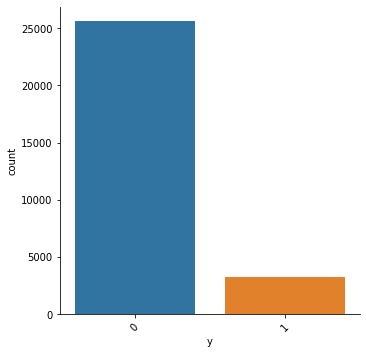

In [139]:
univariante_plot('y',y_train )

In [166]:
from sklearn.model_selection import StratifiedKFold 
def model_predictor(model, x, y):
    scores = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(X_train, y_train):

        KX_train, KX_test = X_train.iloc[train_index], X_train.iloc[test_index]
        Ky_train, Ky_test = y_train.iloc[train_index], y_train.iloc[test_index]


        trained_model = model.fit(KX_train, Ky_train)
        scores.append(model.score(X = KX_test ,y = Ky_test))
    return trained_model, scores

In [167]:
# Initialize logistic regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C=59.94842503189409, solver='liblinear')

#Initialize decision tree
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=10, 
                             criterion='entropy',random_state=0)

#initialize XGBoost
import xgboost as xgb
XGB_model = xgb.XGBClassifier()

In [168]:
#fit models, predict and determine scores
log_model_trained_model, log_model_scores,  = model_predictor(log_model, pca_train_X, y_train)
print("Accuracy of the model is" + ":" +str(np.mean(log_model_scores)))
print("std of scores computed" + ":" +str(np.std(log_model_scores)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

Accuracy of the model is:0.8989282316691648
std of scores computed:0.0018006217928016937


In [169]:

y_pred_log = pd.DataFrame(log_model.predict(X_test), columns = ['Term Prediction'])
y_pred_log.head()

,Term Prediction
0,0
1,0
2,0
3,0
4,0


In [170]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix)
print(classification_report(y_test, y_pred_log))

[[10820   141]
 [ 1071   325]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10961
           1       0.70      0.23      0.35      1396

    accuracy                           0.90     12357
   macro avg       0.80      0.61      0.65     12357
weighted avg       0.89      0.90      0.88     12357



In [160]:
from sklearn.model_selection import GridSearchCV
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

#using grid search function for hyperparameter tuning
gridsearch = GridSearchCV(log_model, hyperparameters)
best_model_grid = gridsearch.fit(pca_train_X, y_train)
print(best_model_grid.best_estimator_)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A c

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear fa

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear fa

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear fa

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The 

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarni

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: Converge

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: Converge

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: Converge

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConver

LogisticRegression(C=59.94842503189409, solver='liblinear')


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randomizedsearch = RandomizedSearchCV(logistic, hyperparameters)
best_model_random = randomizedsearch.fit(features, target)
print(best_model_random.best_estimator_)

In [77]:
#splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(Feature, target, test_size=0.10, random_state=15)
print ("Training and testing split was successful.")
X_train.head()

Training and testing split was successful.


,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,cons.price.idx,cons.conf.idx,euribor3m
8109,-1.619439,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.251873,0.0,0.0,1,0,0,1.536429,-0.257821,0.717072
26396,-0.995811,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,-1.013071,0.0,0.0,0,1,0,-0.649003,-0.303225,0.262167
29730,-0.268244,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.991818,0.0,0.0,1,0,0,-0.864955,-1.461009,-1.277824
30153,-0.476120,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.013071,0.0,0.0,0,0,1,-0.864955,-1.461009,-1.300886
10719,-0.268244,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.991818,0.0,0.0,1,0,0,1.536429,-0.257821,0.772422


In [78]:
y_train.head()

,y
8109,0
26396,0
29730,0
30153,1
10719,0


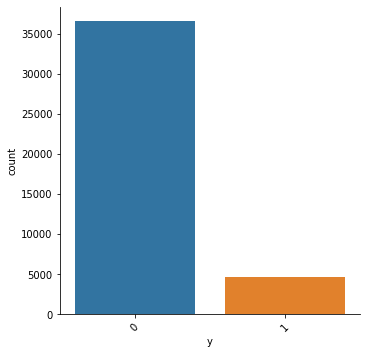

In [24]:
univariante_plot('y', target)

In [25]:
#dealing with class imbalance

In [75]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

X_train_new, y_train_new = sm.fit_sample(X_train, y_train.values.ravel())
y_train_n = pd.DataFrame(y_train_new, columns = ["Y"])
y_train_n.head()

,Y
0,0
1,0
2,0
3,1
4,0


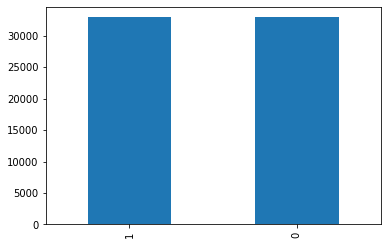

In [46]:
pd.Series(y_train_new).value_counts().plot.bar()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix)
print(classification_report(y_test, y_pred_log))

ROC Curve:

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance

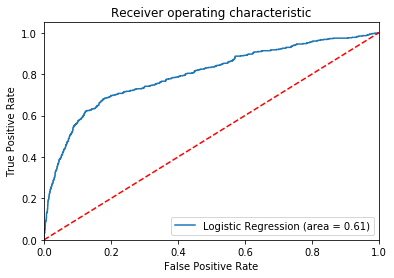

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))
#print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
#print("fpr{}, tpr{}". format(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [80]:
#fit models, predict and determine scores
forest_model_trained_model, forest_model_scores = model_predictor(forest_model, X_train_new, y_train_n.values.ravel())
print("Accuracy of the model is" + ":" +str(np.mean(forest_model_scores)))
print("std of scores computed" + ":" +str(np.std(forest_model_scores)))

#make predictions with validation set
y_pred_forest = pd.DataFrame(forest_model.predict(X_test), columns=["Term Deposit Predictions"])
print(y_pred_forest.head())
y_test.head()



C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Accuracy of the model is:0.8898539627847784
std of scores computed:0.005080516044263883
   Term Deposit Predictions
0                         0
1                         0
2                         1
3                         0
4                         0


,y
32301,1
14796,0
33819,0
15236,0
26854,0


In [16]:
y_test.head()

,y
32301,1
14796,0
33819,0
15236,0
26854,0


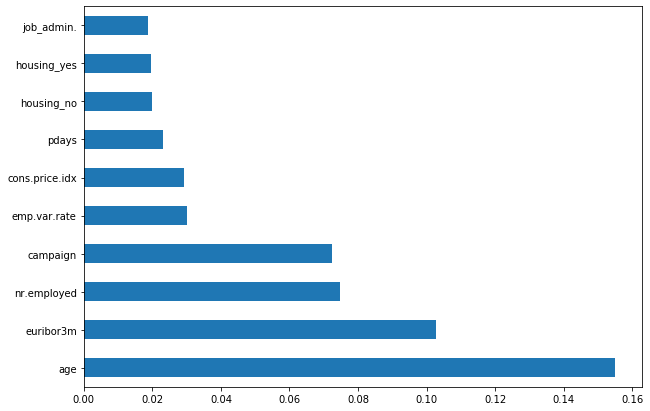

In [81]:
#plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(forest_model.feature_importances_, index = Feature.columns)
feat_importances.nlargest(10).plot(kind='barh');

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix)
print(classification_report(y_test, y_pred_log))

[[3558   66]
 [ 378  117]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3624
           1       0.64      0.24      0.35       495

    accuracy                           0.89      4119
   macro avg       0.77      0.61      0.64      4119
weighted avg       0.87      0.89      0.87      4119



In [83]:

XGB_model_trained_model, XGB_model_scores = model_predictor(XGB_model, X_train_new, y_train_n)
print("Accuracy of model is" + ":" +str(np.mean(XGB_model_scores)))
print("std of scores computed" + ":" +str(np.std(XGB_model_scores)))


#make predictions with validation set
y_pred_XGB = pd.DataFrame(XGB_model.predict(X_test), columns=["y_pred"])
y_pred_XGB.head()


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of model is:0.8979199297838093
std of scores computed:0.0041680318795190895


,y_pred
0,0
1,0
2,0
3,0
4,0


In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred_XGB)
print(confusion_matrix)
print(classification_report(y_test, y_pred_XGB))

[[3517  107]
 [ 355  140]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3624
           1       0.57      0.28      0.38       495

    accuracy                           0.89      4119
   macro avg       0.74      0.63      0.66      4119
weighted avg       0.87      0.89      0.87      4119



In [40]:
confusion_matrix

array([[3507,  117],
       [ 335,  160]], dtype=int64)

#### Handling Outliers by using Automatic Outlier Detector using IsolationForest

In [159]:
from sklearn.covariance import EllipticEnvelope
# summarize the shape of the training dataset
print(Feature.shape, target.shape)
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = iso.fit_predict(Feature)
print(yhat)
# select all rows that are not outliers
mask = yhat != -1
Feature, target = Feature[mask], target[mask]
# summarize the shape of the updated training dataset
print(Feature.shape, target.shape)

(41188, 63) (41188, 1)
[ 1  1  1 ...  1  1 -1]
(37069, 63) (37069, 1)


In [ ]:

# summarize the shape of the training dataset
print(Feature.shape, target.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1, behaviour="new")
yhat = iso.fit_predict(Feature)
print(yhat)
# select all rows that are not outliers
mask = yhat != -1
Feature, target = Feature[mask], target[mask]
# summarize the shape of the updated training dataset
print(Feature.shape, target.shape)